<a href="https://colab.research.google.com/github/yeonathan/Artificial-Neural-Networks-with-Jupyter/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [115]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.3.0


In [12]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [140]:
batch_size = 32 # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

In [14]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


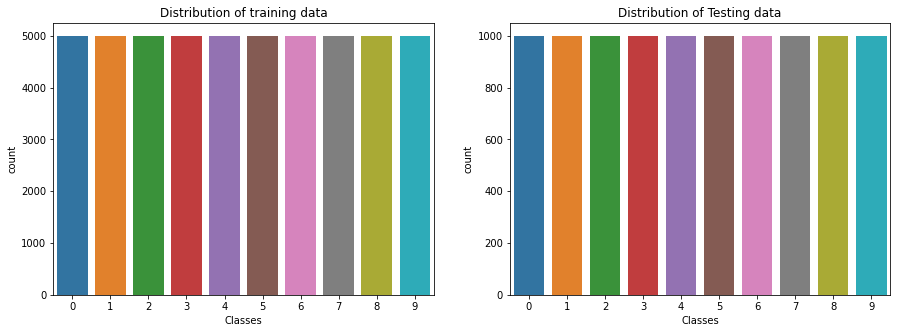

In [15]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [16]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [132]:

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True)

In [1]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.003, momentum=0.9)
model5.compile(optimizer= 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history5=model5.fit(x_train,y_train,epochs=epochs,batch_size = batch_size, validation_data=(x_test,y_test),callbacks=[tensorboard_callback,earlystopping_callback])

NameError: ignored

In [120]:
model5.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_87 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_88 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 64)      

In [ ]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,validation_split = 0.2,
              validation_data=(x_test, y_test), callbacks=[tensorboard_callback,earlystopping_callback],
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-w,callbacks=[tensorboard_callback,earlystopping_callback]ise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4,callbacks=[tensorboard_callback,earlystopping_callback])

In [24]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

NameError: ignored

In [ ]:
%tensorboard --logdir logs/fit

In [121]:
# Score trained model.
scores = model5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model5.predict(x_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.4671 - accuracy: 0.8463
Test loss: 0.4670808017253876
Test accuracy: 0.8463000059127808


In [26]:
pred

array([[6.34396711e-05, 3.49730544e-05, 3.82677943e-04, ...,
        2.09732007e-05, 7.40508112e-05, 2.68355216e-05],
       [1.19169219e-03, 4.57698405e-02, 4.19548599e-07, ...,
        3.05669552e-08, 9.52917516e-01, 1.19444456e-04],
       [1.03838113e-03, 1.03844737e-03, 1.22225421e-04, ...,
        3.24716493e-05, 9.97147739e-01, 3.71447357e-04],
       ...,
       [2.67132850e-06, 7.68290101e-06, 2.73257215e-03, ...,
        1.65193062e-03, 1.39905951e-05, 7.21942070e-06],
       [2.26576328e-02, 9.07484710e-01, 6.10342110e-03, ...,
        5.71006269e-04, 4.44561912e-04, 1.57357822e-03],
       [1.34290135e-08, 1.75138595e-07, 1.49831192e-06, ...,
        9.99912739e-01, 9.07342701e-10, 1.64864620e-08]], dtype=float32)

In [27]:
np.argmax(pred) 

18497

In [28]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [67]:
samples_to_predict = np.array(test_data)


s = samples_to_predict.astype('float32')
s /= 255

sa = s.reshape(2000,32,32,3)
sa.shape

(2000, 32, 32, 3)

In [110]:
pred6 = model5.predict(sa)

In [111]:
pred6

array([[1.1494531e-05, 3.1522489e-09, 9.9990070e-01, ..., 6.2157454e-07,
        1.9480237e-06, 2.5085766e-08],
       [4.9832579e-06, 1.4582891e-06, 3.8703348e-04, ..., 1.1908823e-05,
        7.8190627e-05, 1.5110344e-07],
       [9.0921982e-05, 5.1330910e-05, 5.5599212e-05, ..., 8.8145465e-01,
        1.4777826e-06, 5.5505916e-05],
       ...,
       [1.0505528e-04, 7.8862016e-05, 3.9852210e-03, ..., 2.1368877e-03,
        8.8215078e-04, 1.4755722e-04],
       [3.0929004e-05, 2.3418700e-06, 1.4093165e-04, ..., 1.5191919e-05,
        4.8911108e-05, 4.5541037e-06],
       [7.7735423e-04, 5.8059071e-05, 5.7810023e-02, ..., 5.2632164e-04,
        7.8235171e-04, 3.6603661e-04]], dtype=float32)

In [112]:
# Generate arg maxes for predictions
classes = np.argmax(pred6, axis = 1)
c = print(classes)

[2 3 7 ... 3 3 4]


In [113]:
print(*classes, sep = ", ")  

2, 3, 7, 8, 6, 1, 3, 7, 3, 5, 8, 1, 4, 1, 4, 7, 0, 0, 7, 6, 5, 9, 4, 8, 4, 0, 8, 7, 0, 7, 7, 3, 2, 4, 2, 0, 6, 4, 2, 4, 5, 2, 5, 1, 4, 3, 5, 2, 4, 4, 3, 8, 7, 5, 8, 1, 1, 7, 1, 0, 7, 1, 7, 6, 1, 1, 9, 8, 3, 1, 6, 6, 9, 7, 2, 0, 4, 6, 4, 8, 4, 5, 8, 9, 1, 7, 3, 6, 3, 4, 5, 8, 0, 8, 1, 0, 9, 7, 1, 6, 8, 5, 2, 7, 4, 9, 4, 8, 3, 0, 3, 0, 9, 0, 1, 4, 6, 5, 0, 2, 1, 6, 1, 0, 6, 3, 3, 0, 1, 8, 4, 6, 4, 8, 3, 7, 9, 4, 9, 6, 7, 0, 5, 4, 4, 6, 4, 8, 2, 0, 3, 4, 2, 8, 5, 5, 5, 5, 2, 4, 5, 2, 9, 8, 7, 5, 6, 1, 8, 1, 2, 3, 9, 2, 1, 6, 0, 2, 3, 7, 2, 7, 2, 3, 0, 6, 4, 7, 4, 3, 6, 8, 0, 5, 1, 6, 4, 6, 8, 1, 8, 5, 2, 6, 8, 0, 1, 0, 0, 3, 2, 8, 1, 5, 6, 8, 6, 4, 1, 3, 5, 4, 7, 7, 5, 7, 3, 0, 3, 7, 7, 6, 4, 1, 9, 8, 8, 8, 0, 7, 1, 7, 0, 5, 2, 4, 3, 4, 6, 1, 9, 8, 0, 9, 6, 5, 3, 8, 0, 2, 4, 8, 2, 9, 8, 3, 0, 1, 0, 2, 8, 8, 8, 9, 5, 6, 1, 6, 3, 1, 0, 7, 3, 1, 4, 0, 4, 5, 0, 4, 7, 4, 0, 1, 8, 1, 3, 3, 9, 2, 2, 2, 4, 8, 0, 4, 4, 9, 5, 9, 2, 3, 7, 1, 1, 3, 2, 3, 8, 0, 5, 9, 1, 9, 4, 1, 9, 1, 8, 8, 6, 4, 8, 8

In [91]:
res = pd.DataFrame(classes) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = x_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [83]:
from google.colab import files
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
res.columns

RangeIndex(start=0, stop=1, step=1)

In [84]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

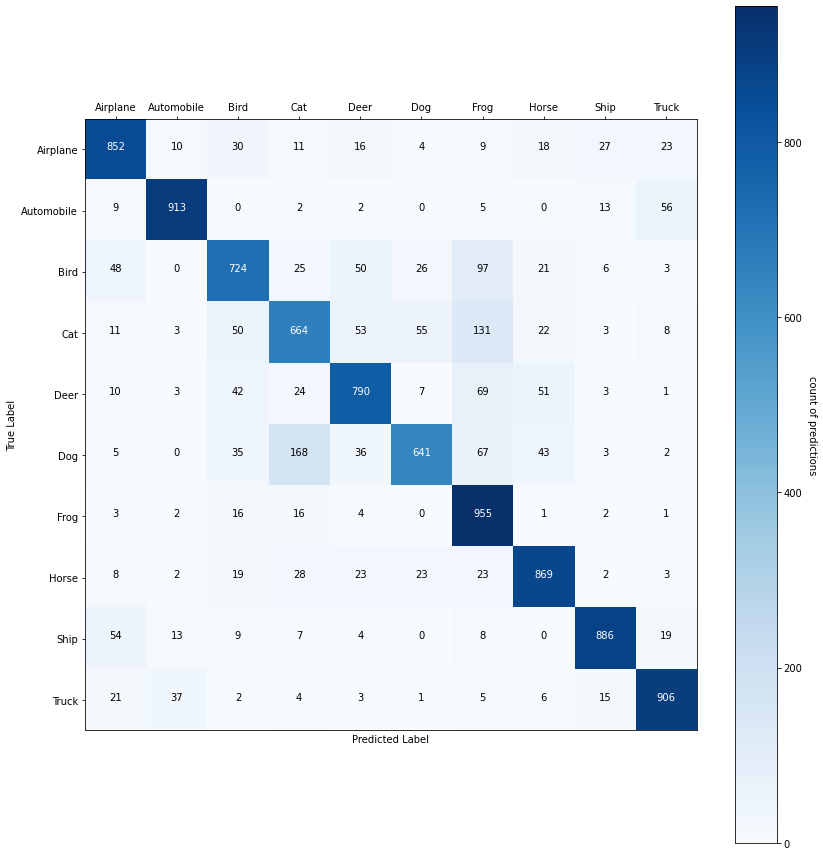

In [86]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


In [ ]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 10 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(12,6))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32,3)))
            ax[row,col].set_title("Predicted:{}\nTrue:{}".
                                  format(labels[pred_errors[error]],labels[obs_errors[error]]))
            n += 1
            ax[row,col].axis('off')
            plt.subplots_adjust(wspace=1)

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 10 errors 
most_important_errors = sorted_dela_errors[-10:]

# Show the top 10 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

In [ ]:
show_test(20)

In [ ]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model5.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])